In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # Disable warning for chained assignments
import numpy as np
import matplotlib.pyplot as plt
from random import *  # Import random module
from scipy.stats import entropy  # Import entropy function from scipy.stats
import io, json  # Import io and json modules
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5)  # Set seaborn style and font scale

In [2]:
filepath = '../experiment/public/'  # Set the file path

df = pd.read_csv(filepath + 'videos/categorization_html.csv', \
                 header=None)  # Read CSV file of html video info into a pandas DataFrame
df_length_videos = pd.read_csv(filepath + 'videos/length_size_videos.txt', \
                               header=None)  # Read text file about video lengths into a pandas DataFrame

In [3]:
# Create a DataFrame to store the emotion ratings for each video
category_df = pd.DataFrame(index=np.arange(len(df)))
category_df['videoID'] = np.nan

# Iterate over each row in the DataFrame
for i in range(len(df)):
    # Extract the relevant string
    string = df[0][i]
    
    # Find the index of the '%' symbol
    idx = string.find('%')
    
    # Extract the substring containing the emotion ratings
    string = string[idx-2:]
    
    # Find the index of the '&' symbol
    idx = string.find('&')
    
    # Extract the substring without the '&' symbol
    string = string[:idx]
    
    # Split the string into a list of substrings
    string_list = string.split("+")
    
    # Set the videoID column value for the current row
    category_df['videoID'][i] = str(format(i+1, '04d')) + '.mp4'
    
    # Iterate over each emotion rating substring
    for j in range(len(string_list)):
        # Split the substring into the emotion category
        category = string_list[j].split()[1]
        
        # If the emotion category is not already a column in the DataFrame, add it
        if category not in category_df.columns:
            category_df[category] = np.nan
        
        # Set the emotion rating for the current video and emotion category
        category_df[category][i] = int(string_list[j].split('%')[0])
        

In [4]:
# Extract length and size information from the DataFrame
length_video = df_length_videos.iloc[0:int((len(df_length_videos)-1)/2)]
size_video = df_length_videos.iloc[int((len(df_length_videos)-1)/2):-1]

# Extract video names from the DataFrame
video_name = df_length_videos.iloc[-1]
video_name = video_name[0].split("./")[1:]
sort_idx = np.argsort(video_name)

# Find the index of the video to drop ('0001a.mp4')
drop_idx = video_name.index('0001a.mp4')

# Sort and drop the corresponding rows in the length and size DataFrames
length_video_sorted = length_video.iloc[sort_idx]
length_video_sorted = length_video_sorted.drop(index=drop_idx)
size_video_sorted = size_video.iloc[sort_idx]
size_video_sorted = size_video_sorted.drop(drop_idx+int((len(df_length_videos)-1)/2))

# Extract width and height values from the size DataFrame
width = size_video_sorted[0].str.split('x',expand=True)[0]
height = size_video_sorted[0].str.split('x',expand=True)[1]

# Determine which videos to keep based on length and size criteria
videos_to_keep = length_video_sorted[0].astype(float).between(2, 10, inclusive=True) \
                & np.array(width.astype(float) > 250) & np.array(height.astype(float) > 250)

/var/folders/s_/7p7b7rls6rl2gtzh2m765mdh0000gn/T/ipykernel_16315/1036432911.py:24: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  videos_to_keep = length_video_sorted[0].astype(float).between(2, 10, inclusive=True) \


In [5]:
# Filter the category DataFrame based on the videos to keep
category_df_included = category_df.loc[videos_to_keep.to_numpy()].reset_index(drop=True)

# Reset the index of the filtered DataFrame
category_df_included = category_df_included.reset_index(drop=True)

# Replace missing values with 0
category_df_included = category_df_included.fillna(0)

# Save the filtered DataFrame to a CSV file
category_df_included.to_csv(filepath + '/videos/videosRatingsCowenKeltner.csv')

# Display the first few rows of the filtered DataFrame
category_df_included.head()

,videoID,Interest,Fear,Surprise,Confusion,Disappointment,Sadness,Aesthetic,Anger,Anxiety,...,Calmness,Disgust,Entrancement,Relief,Satisfaction,Pride,Triumph,Envy,Craving,Contempt
0,0001.mp4,42.0,33.0,25.0,17.0,17.0,17.0,8.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006.mp4,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0009.mp4,0.0,0.0,17.0,0.0,0.0,67.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
3,0012.mp4,17.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,17.0,17.0,8.0,0.0,0.0
4,0015.mp4,8.0,58.0,17.0,8.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Get the names of the video categories from the filtered DataFrame
video_categories = category_df_included.columns[1:]

# Display the video categories
video_categories

Index(['Interest', 'Fear', 'Surprise', 'Confusion', 'Disappointment',
       'Sadness', 'Aesthetic', 'Anger', 'Anxiety', 'Awe', 'Guilt', 'Horror',
       'Nostalgia', 'Amusement', 'Sexual', 'Boredom', 'Excitement', 'Romance',
       'Sympathy', 'Admiration', 'Awkwardness', 'Empathic', 'Joy', 'Adoration',
       'Calmness', 'Disgust', 'Entrancement', 'Relief', 'Satisfaction',
       'Pride', 'Triumph', 'Envy', 'Craving', 'Contempt'],
      dtype='object')

In [7]:
# Convert the video ratings DataFrame to a numpy matrix
category_matrix = category_df_included.iloc[:, 1:].to_numpy()

# Replace any NaN values in the matrix with zeros
category_matrix = np.nan_to_num(category_matrix)

# Print the total number of videos
print('total number of videos: ' + str(len(category_matrix)))

total number of videos: 803


In [8]:
# Calculate entropy of each video
for i in range(len(category_df_included)):
    category_df_included.loc[i,'entropy'] = entropy(category_matrix[i,:])
    category_df_included.loc[i,'max value'] = category_matrix[i,:].max()
    category_df_included.loc[i,'max category'] = video_categories[category_matrix[i,:] \
                                                                  == category_matrix[i,:].max()][0]

In [9]:
# Exclude those were max rating below 30 (from 0-100)
category_df_included = category_df_included[~(category_df_included['max value'] <= 30)].reset_index()

We want those videos with low entropy and high rating (lower-right corner)


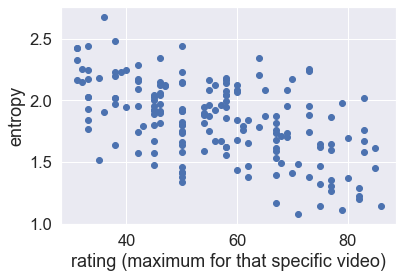

In [10]:
# Example plot max value vs entropy for category Amusement
plt.scatter(category_df_included['max value'][category_df_included['max category']=='Amusement'], \
            category_df_included['entropy'][category_df_included['max category']=='Amusement'])
plt.xlabel('rating (maximum for that specific video)');
plt.ylabel('entropy');
print('We want those videos with low entropy and high rating (lower-right corner)')

In [11]:
# Specify the video categories for the experiment
categories_of_interest = ['Calmness','Amusement','Sadness','Anxiety','Disgust']

# If not enough videos in category use those most similar categories:
backup_category = ['Aesthetic', 'Joy', 'Sympathy', 'Fear', 'Horror']

Ntrials = 100 # number of trials including first and second block of video clips
Nvideos_per_cat = int(Ntrials / len(categories_of_interest)); # number of videos per category

In [12]:
# Print the number of videos needed for each category
print(str(Nvideos_per_cat) + ' videos needed for each category!')

# Count the number of videos in the included category that match the current category of interest
for i in range(len(categories_of_interest)):
    print(categories_of_interest[i], end=': ')
    count = sum((category_df_included['max category'] == categories_of_interest[i]))
    # Print the count
    print(count)

20 videos needed for each category!
Calmness: 5
Amusement: 174
Sadness: 28
Anxiety: 22
Disgust: 48


In [13]:
# Choose the videos with max rating and min entropy within a category
Nvideos_per_cat = 20
finalVideoList = pd.DataFrame()

# Iterate over the categories of interest
for k in range(len(categories_of_interest)):
    # Get the indices of videos in the included category that match the current category of interest
    idx = category_df_included[category_df_included['max category'] == categories_of_interest[k]] \
        .sort_values(['entropy', 'max value'], ascending=[True, False]).index.to_list()
    
    # Check if the number of videos is less than the desired number per category
    if len(idx) < Nvideos_per_cat:
        # Get the indices of videos in the included category that match the backup category
        idx2 = category_df_included[category_df_included['max category'] == backup_category[k]] \
            .sort_values(['entropy', 'max value'], ascending=[True, False]).index.to_list()
        # Combine the indices from both categories
        idx = idx + idx2
    
    # Select the number of videos
    finalVideoList[categories_of_interest[k]] = category_df_included['videoID'].iloc[idx[:Nvideos_per_cat]].values

# Print the final video list
print(finalVideoList)

    Calmness Amusement   Sadness   Anxiety   Disgust
0   1835.mp4  0938.mp4  1959.mp4  1313.mp4  2018.mp4
1   1216.mp4  0740.mp4  0756.mp4  0046.mp4  1471.mp4
2   1760.mp4  1289.mp4  2035.mp4  0377.mp4  1123.mp4
3   0590.mp4  0741.mp4  0059.mp4  0489.mp4  0048.mp4
4   1716.mp4  1963.mp4  0067.mp4  0604.mp4  2019.mp4
5   0058.mp4  2061.mp4  1238.mp4  0329.mp4  2106.mp4
6   1988.mp4  2111.mp4  1101.mp4  0615.mp4  0551.mp4
7   0055.mp4  2039.mp4  2038.mp4  0722.mp4  0271.mp4
8   0636.mp4  1047.mp4  0700.mp4  0598.mp4  0865.mp4
9   1071.mp4  0416.mp4  1259.mp4  1657.mp4  0857.mp4
10  0084.mp4  1290.mp4  0009.mp4  0853.mp4  1414.mp4
11  0870.mp4  0728.mp4  0181.mp4  1297.mp4  0464.mp4
12  0969.mp4  0653.mp4  1231.mp4  0372.mp4  1122.mp4
13  1496.mp4  0503.mp4  1279.mp4  0096.mp4  0214.mp4
14  1132.mp4  2031.mp4  2011.mp4  1679.mp4  1268.mp4
15  2163.mp4  0625.mp4  1485.mp4  0045.mp4  1916.mp4
16  1195.mp4  0633.mp4  0104.mp4  0648.mp4  1309.mp4
17  0397.mp4  2182.mp4  0051.mp4  0985.mp4  21

In [14]:
# Create two sets of videos for the first and second block
catList = []

# Iterate over half of the number of videos per category
for j in range(int(Nvideos_per_cat/2)):
    # Iterate over the categories of interest
    for i in categories_of_interest:
        # Append the category to the catList
        catList.append(i)

# Create a dictionary to store the video sets and category information
df_finalVideoList = {'videoset1': finalVideoList.iloc[np.arange(1, Nvideos_per_cat, 2)].values.flatten(),
                     'videoset2': finalVideoList.iloc[np.arange(0, Nvideos_per_cat, 2)].values.flatten(),
                     'category': catList}

# Create a DataFrame from the dictionary
df_finalVideoList = pd.DataFrame(df_finalVideoList)

# Uncomment the following line if shuffling the DataFrame is desired
# df_finalVideoList = df_finalVideoList.sample(frac=1)

In [15]:
# Repeat certain videos in the experiment to test for rating reliability
x = 2 # Define the number of times each video clip should be repeated within the same category
y = 3 # Define the total number of times each video clip should be shown in each set

# Randomly select x videos from the finalVideoList to repeat
repeat_videos = df_finalVideoList.sample(x)

# Repeat the selected videos y-1 times and concatenate them to the finalVideoList
df_finalVideoList = pd.concat((df_finalVideoList, pd.DataFrame(np.repeat(repeat_videos.values, y-1, axis=0),
                                                              columns=df_finalVideoList.columns)), axis=0,
                              ignore_index=True)

# Shuffle the order of videos in the finalVideoList
df_finalVideoList = df_finalVideoList.sample(frac=1)

In [16]:
# Uncomment the following line if saving this videolist for experiment is desired
# df_finalVideoList.to_csv(filepath + 'prep/videosForExperiment.csv')
# with io.open(filepath + 'prep/videosForExperiment.js', 'w', encoding='utf-8') as f:
#     f.write('var video_set = ' + str([df_finalVideoList['videoset1'].values.tolist(),\
#                                       df_finalVideoList['videoset2'].values.tolist()]))

All videos were reviewed to ensure that they are suitable for the experiment. Some videos were excluded for a particular reason, as noted in the file: /experiement/public/prep/VideosForExperiment_checked.xlsx

In [17]:
# Calculate the number of trials to be used for attention checks (10% of the total number of trials)
Nattentionchecks = int(np.ceil(Ntrials * 0.1))

# Randomly select attention check trials from the list of all trials
attentionchecktrials = sample(list(np.arange(Ntrials)), Nattentionchecks)

# Divide the attention check trials into fix_trials and check_trials
fix_trials = attentionchecktrials[:int(np.ceil(len(attentionchecktrials)/2))]
check_trials = attentionchecktrials[int(np.ceil(len(attentionchecktrials)/2)):]

# Print the selected fix_trials and check_trials
print(fix_trials, check_trials)

# Uncomment the following lines if saving this trial list for attention check for experiment is desired
# with io.open(filepath + 'prep/attentionchecks.js', 'w', encoding='utf-8') as f:
#     f.write('var fix_trials = '+ str(fix_trials) + '\nvar check_trials = ' + str(check_trials))

[93, 22, 99, 20, 98] [46, 68, 14, 58, 70]


In [18]:
# Load final videolist to replicate figures below
df_finalVideoList = pd.read_csv(filepath + 'prep/videosForExperiment.csv')

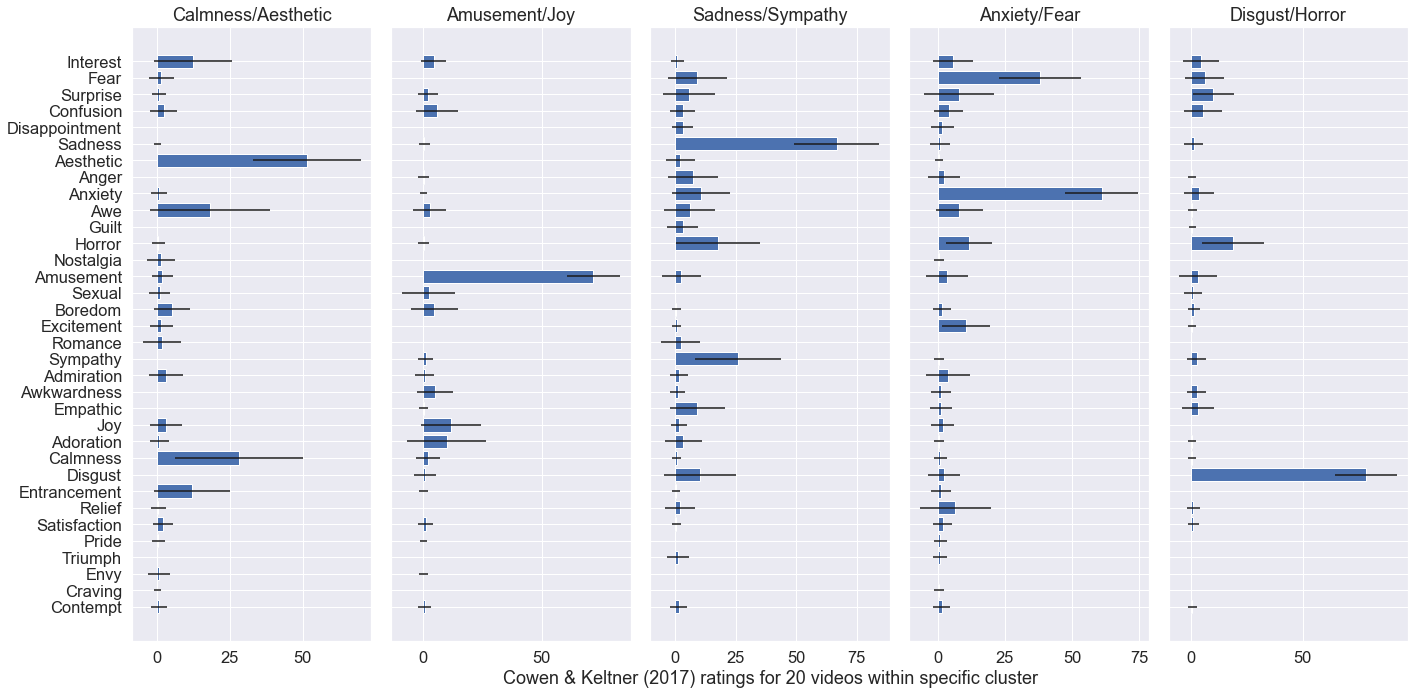

In [19]:
# Plot the mean and standard deviation of ratings for videos within each category

# Create a figure with subplots for each category
fig, axs = plt.subplots(1, len(categories_of_interest), figsize=[20, 10])

# Iterate over each category
for k in range(len(categories_of_interest)):
    # Get the indices of videos within the current category
    idx = category_df_included[category_df_included['max category'] == \
                               categories_of_interest[k]].sort_values(['entropy', 'max value'], \
                                                                      ascending=[True, False]).index.to_list()

    # Check if there are not enough videos in the current category and include videos from the backup category
    if len(idx) < Nvideos_per_cat:
        idx2 = category_df_included[category_df_included['max category'] == \
                                    backup_category[k]].sort_values(['entropy', 'max value'], \
                                                                    ascending=[True, False]).index.to_list()
        idx = idx + idx2

    # Calculate the mean and standard deviation of ratings for the videos in the current category
    m = category_df_included[video_categories].iloc[idx[:Nvideos_per_cat]].mean()
    e = category_df_included[video_categories].iloc[idx[:Nvideos_per_cat]].std()

    # Create a horizontal bar plot with error bars
    axs[k].barh(np.arange(0, 34), m, xerr=e)

    # Set plot properties
    if k == 2:
        axs[k].set_xlabel('Cowen & Keltner (2017) ratings for 20 videos within specific cluster')
    axs[k].set_yticks(np.arange(0, 34))

    if k == 0:
        axs[k].set_yticks(np.arange(0, 34))
        axs[k].set_yticklabels(video_categories, rotation=0)
    else:
        axs[k].set_yticklabels([])

    axs[k].set_title(categories_of_interest[k] + '/' + backup_category[k])
    axs[k].invert_yaxis()

# Adjust the layout and save the figure
fig.tight_layout()
plt.savefig('../results/figures/video_cluster_ratings.png')

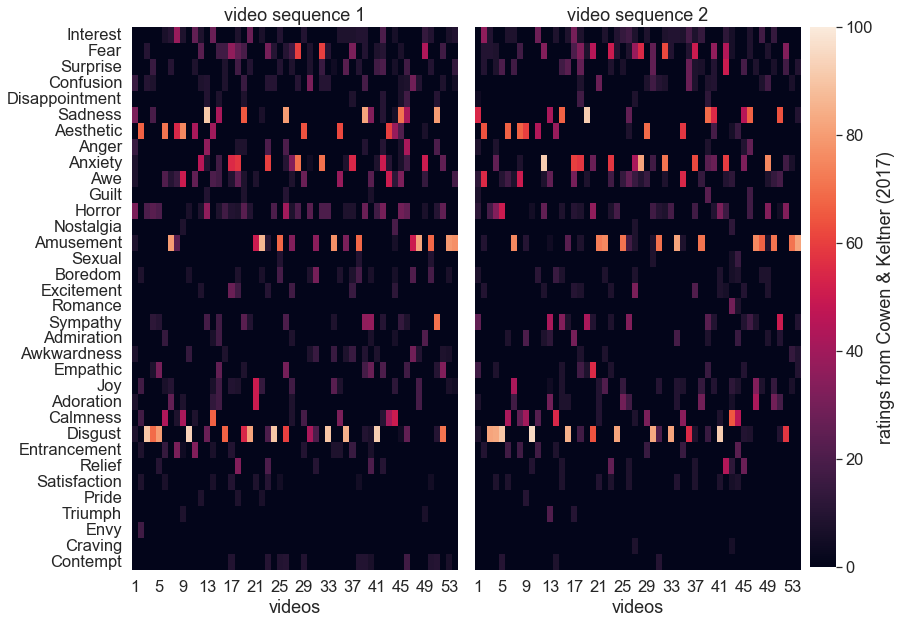

In [20]:
# Plot heatmaps to show the ratings for videos in each video set

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 10), gridspec_kw={'wspace': 0.05})

# Iterate over the two video sets
for i in range(1, 3):
    rating_list = []
    
    # Retrieve ratings for each video in the current set
    for j in range(len(df_finalVideoList['videoset' + str(i)])):
        rating_list.append(category_df_included[video_categories]\
                           [category_df_included['videoID'] == \
                            df_finalVideoList['videoset' + str(i)][j]].values)
    
    if i == 1:
        show_cbar = False
        cbar_ax = None
    else:
        show_cbar = True
        cbar_ax = fig.add_axes([.91, 0.13, .03, 0.75])

    # Create a heatmap using seaborn
    b = sns.heatmap(
        np.array(rating_list).reshape(np.shape(rating_list)[0], len(video_categories)).T,
        yticklabels=video_categories,
        xticklabels=range(1, np.shape(rating_list)[0] + 1),
        ax=ax[i-1],
        vmax=100,
        cbar=show_cbar,
        cbar_ax=cbar_ax,
        cbar_kws={'label': 'ratings from Cowen & Keltner (2017)'}
    )
    
    # Set plot properties
    b.set_title('video sequence ' + str(i))
    b.set_xlabel('videos')
    
    if i == 1:
        b.set_yticklabels(video_categories, rotation=0)
    else:
        b.set_yticklabels([])
    
    b.set_xticklabels(b.get_xticklabels(), rotation=0)
    [l.set_visible(False) for (i, l) in enumerate(b.get_xticklabels()) if i % 4 != 0]

# Save the figure
plt.savefig('../results/figures/video_selection_all.png', bbox_inches='tight')